In [1]:
# conding: utf-8

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV, LassoLarsCV, LinearRegression

### Functions

In [4]:
def sign(a):
    return -1 if a < 0 else 1

def r_score(model, x, y):
    """
        model: model fitted
        x: target labels
        y: target values
    """
    r2 = model.score(x, y)
    return sign(r2) * math.sqrt(abs(r2))
              

def make_plynomial_df(df, n=2):
    """ """
    poly = PolynomialFeatures(n)
    ployDf = pd.DataFrame(poly.fit_transform(df)).drop([0], axis=1)
    #timestamp = df["timestamp"]
    #ployDf["timestamp"] = timestamp
    
    return ployDf

In [5]:
### test
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

r2_score(y_true, y_pred) # 0.94860813704496794

0.94860813704496794

In [6]:
fooDf = pd.DataFrame({'col_': [3, 3, 3, 3]})
make_plynomial_df(fooDf, 5)

,1,2,3,4,5
0,3.0,9.0,27.0,81.0,243.0
1,3.0,9.0,27.0,81.0,243.0
2,3.0,9.0,27.0,81.0,243.0
3,3.0,9.0,27.0,81.0,243.0


### The Dataset

In [7]:
with pd.HDFStore("../data/train.h5", "r") as data:
    DATA = data.get("train")

In [8]:
DATA.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [9]:
print "Number of entries :\t ",len(DATA)
print "Number of features :\t ",len(DATA.columns) - 2 #- non-features: id & y

Number of entries :	  1710756
Number of features :	  109


In [10]:
print "Number of unique ID",len(DATA.id.unique())

Number of unique ID 1424


In [11]:
desc = DATA.describe()
desc.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,...,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.536046e+00,7.729436e+11,-3.320328e-01,-5.046012e-01,1.801661e+01,-2.040938e-02,-5.703754e+08,-1.622954e-01,...,-8.584833e-02,-9.103397e-02,-8.156685e-02,-7.287001e-02,4.908321e-02,5.236218e-03,-1.699966e-02,-9.735299e-01,3.881475e-04,2.217509e-04
std,6.308563e+02,5.195685e+02,2.497382e+02,7.620606e+13,6.519810e+01,1.020749e+02,9.258360e+02,2.494859e-01,7.502322e+10,3.668150e+00,...,6.125852e-01,2.471038e-01,2.346534e-01,2.235729e-01,3.102316e-01,1.133733e-01,2.116284e-01,9.605551e-01,3.011983e-02,2.240643e-02
min,0.000000e+00,0.000000e+00,-2.017497e+04,-7.375435e-02,-9.848880e+03,-3.434176e+04,-8.551914e+03,-2.344957e+00,-1.043737e+13,-1.077101e+03,...,-1.687572e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-5.250904e-01,-4.449529e-01,-1.000000e+00,-2.000000e+00,-1.265686e-01,-8.609413e-02
25%,5.500000e+02,5.040000e+02,-1.449710e-01,-2.956479e-02,-5.967524e-02,-1.655826e-01,-1.057050e-01,-1.996543e-01,-1.960470e-01,-2.280967e-01,...,-4.050297e-01,-4.651562e-04,-1.992532e-04,-2.203252e-05,-1.521701e-01,-7.377038e-02,-3.887695e-15,-2.000000e+00,-1.998819e-02,-9.561389e-03


#### Lets look at the Nan

In [12]:
firts_feature, last_feature = (0, 6) 
feature_window = None # (firts_feature, last_feature) #

In [13]:
nans = DATA.isnull().sum().to_dict()
nans = pd.DataFrame({'feature': nans.keys(), 'numNan': nans.values()})

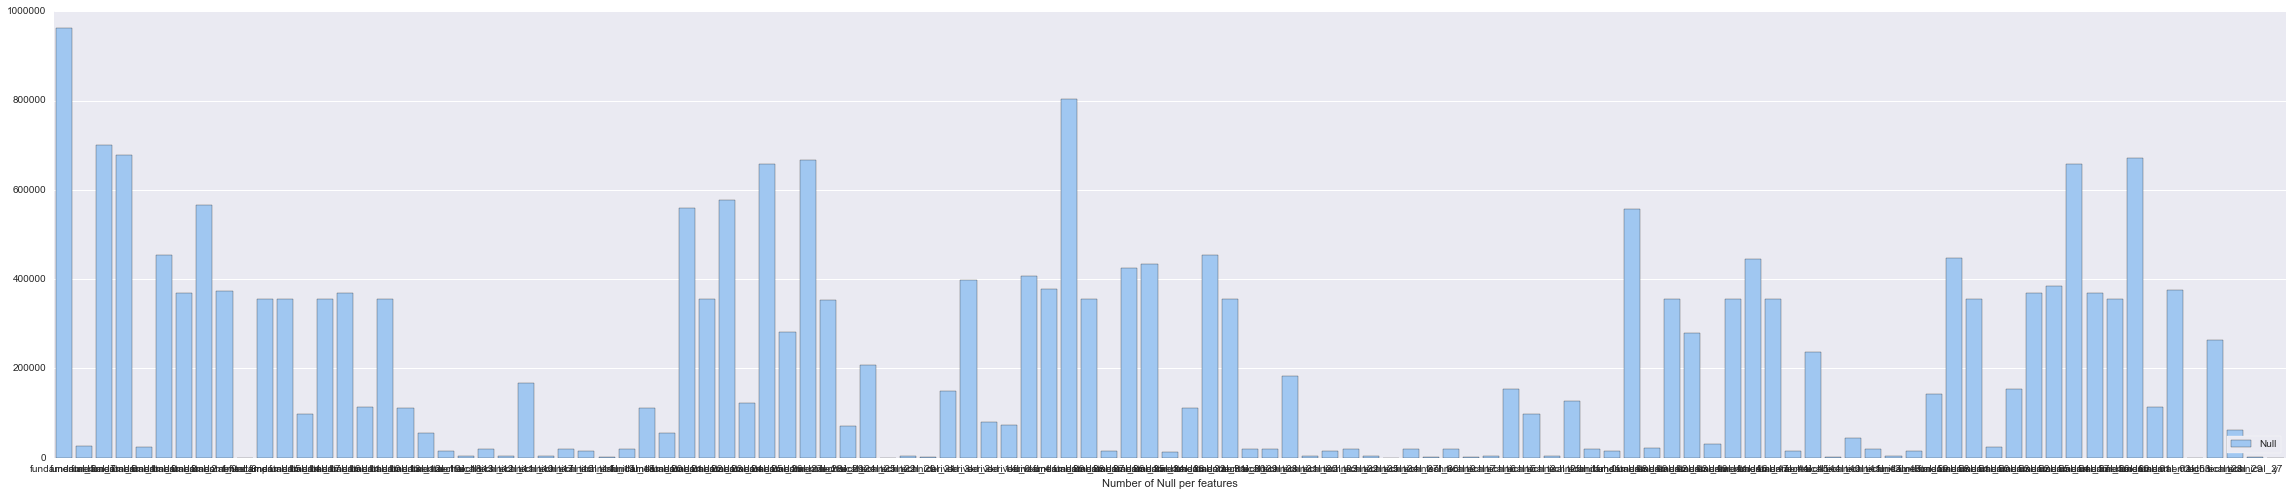

In [14]:
f, ax = plt.subplots(figsize=(40, 8))

sbn.set_color_codes("pastel")

sbn.barplot(x="feature", y="numNan", data=nans, label="Null", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(xlim=feature_window, ylabel="", xlabel="Number of Null per features")

sbn.despine(left=True, bottom=True)

In [ ]:
print "The 3 five the most scattered features :%s "%nans.sort_values("numNan", ascending=False)["feature"][:3].tolist()

The 3 five the most scattered features :[u'fundamental_5', u'fundamental_38', u'fundamental_6'] 


In [ ]:
DATA_MEANS = DATA.mean()
DATA.fillna(DATA_MEANS, inplace=True)
DATA.head()

In [ ]:
r = DATA.corr()["y"]

In [ ]:
print r.sort_values()[104:-1]
features = r.sort_values()[104:-1].keys()

In [ ]:
DATA_MEANS.technical_30

In [ ]:
sbn.pairplot(DATA[0:1000], kind="reg", size=4.0, y_vars=["y"],
            x_vars=["technical_30", "fundamental_11", 'fundamental_53'])

### Data Sampling

In [ ]:
DATA_TRAIN, DATA_VALID = train_test_split(DATA, test_size=0.2, random_state=42)

In [ ]:
print "Number of data points on the trainning  set :\t",len(DATA_TRAIN)
print "Number of data points on the validation set :\t",len(DATA_VALID)

### Fitting the firts model

> *Mais?! il est ou le model... * 

### Linear Model

In [ ]:
print "Univariate Linear Regression"
for f in features: 
    lm = LinearRegression()
    lm.fit(X=DATA_TRAIN[[f]], y=DATA_TRAIN["y"])
    print f + ": Score ~> %.8f"%r_score(lm, DATA_VALID[[f]],DATA_VALID.y)    

### Multi Linear Model

In [ ]:
for  f, feature in enumerate(features): 
    f += 1
    scope = features[-f:].tolist()
    lmr = RidgeCV(cv=8)
    lmr.fit(X=DATA_TRAIN[scope], y=DATA_TRAIN["y"])
    print scope
    print "Score : %.8f"%r_score(lmr, DATA_VALID[scope], DATA_VALID["y"])
    

### Polinomial Features

In [ ]:
POLY_RESULT = list()
feature = ['technical_30', 'fundamental_11']
for n in range(1,5):
    lmp = RidgeCV(cv=12, gcv_mode='svd')    
    lmp.fit(make_plynomial_df(DATA_TRAIN[feature], n), DATA_TRAIN.y)
    tmp_score = r_score(lmp, make_plynomial_df(DATA_VALID[feature], n), DATA_VALID.y)
    POLY_RESULT.append(tmp_score)
    if n <= 10:
        print "Power: %i, score: %.8f"%(n, tmp_score)

In [ ]:
DATA_VALID['technical_30'][2000], [x for x in range(0,2000,1)]

In [ ]:
sbn.set(style="ticks")

In [ ]:
sbn.stripplot(x="technical_30", y="y", data=DATA_TRAIN[:1000])
# color=sbn.xkcd_rgb["cool blue"]

In [ ]:
lm = RidgeCV(cv=8, gcv_mode="svd")
#lm = SGDRegressor(penalty="l2", learning_rate="optimal")

In [ ]:
lm.fit(X=DATA_TRAIN[features], y=DATA_TRAIN["y"])

In [ ]:
lm.score(DATA_VALID[features], y=DATA_VALID["y"])

In [ ]:
lm.score(DATA_VALID[features], y=DATA_VALID["y"])

In [ ]:
poly = PolynomialFeatures(2)
POLY_DATA_TRAIN = poly.fit_transform(DATA_TRAIN[features])
POLY_DATA_VALID = poly.fit_transform(DATA_VALID[features])

In [ ]:
lm.fit(X=pd.DataFrame(POLY_DATA_TRAIN), y=DATA_VALID["y"])

In [ ]:
#makePlynomialDf(DATA_TRAIN[features])
DATA_TRAIN[features].head()

In [ ]:
corrNonNul = {}

for col in DATA.columns:
    if col not in ["id", "y", "timestamp"]:
        colSerie = DATA[[col, "y"]].dropna()
        corrNonNul[col] = colSerie.corr()["y"][col]

corrNonNul = pd.Series(corrNonNul)

In [ ]:
DATA.head()